# Live code 3
Muhammad Ikhsan Rahman Hakim - FTDS001

- Menggunakan konsep central of tendency, apakah data cenderung berpusat pada purchased=0 atau purchased=1?
- Buatlah analisa menggunakan konsep hypothesis testing dan A/B testing (Informasikan H0 dan H1 pada bagian Mathematical Calculation and Analysis)
- Apa kesimpulanmu terhadap hasil A/B testing?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random
%matplotlib inline

Import data dan pengecekan data sederhana

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/purchase_data.txt?token=AEZDEHRU5YLQEXGDDLCL6CLA2KZTI", sep=';')

In [3]:
df.head(10)

,user_id,timestamp,group,landing_page,purchased
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [4]:
df.shape

(294478, 5)

Dengan .describe() kita dapat mengetahui ringkasan statistik untuk semua kolom numerik dalam dataframe. 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,294478.0,787974.124733,91210.823776,630000.0,709032.25,787933.5,866911.75,945999.0
purchased,294478.0,0.119659,0.324563,0.0,0.00,0.0,0.00,1.0


In [6]:
print ('Min: ' + str(df['purchased'].min()))
print ('Mode: ' + str(df['purchased'].mode()[0]))
print ('Median: ' + str(df['purchased'].median()))
print ('Mean: ' + str(df['purchased'].mean()))
print ('Max: ' + str(df['purchased'].max()))

Min: 0
Mode: 0
Median: 0.0
Mean: 0.11965919355605512
Max: 1


### Soal 1
Menggunakan konsep central of tendency, apakah data cenderung berpusat pada purchased=0 atau purchased=1?

In [75]:
A=df['purchased'][df['purchased']==0].count()
B=df['purchased'][df['purchased']==1].count()
A,B

(259241, 35237)

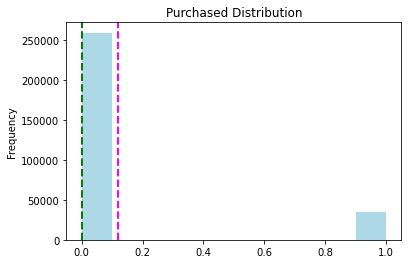

Mean: 0.11965919355605512
Std: 0.32456313511492474


In [7]:
purchased = df['purchased']
purchased.plot.hist(title='Purchased Distribution', color='lightblue', bins=10)  
plt.axvline(purchased.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(purchased.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()
print ('Mean: ' + str(purchased.mean()))
print ('Std: ' + str(purchased.std()))

Terlihat dari histogram diatas, data cenderung berpusat di Purchased=0, dan menghasilkan distribusi *Right skewed*, dikarenakan mean yang berada di sebelah kanan median dan jika seolah-olah digambarkan dengan kurva akan menghasilkan kurva asimetrik yang berakhir di sebelah kanan.

In [8]:
#menentukan kurtosis dan skeweness
pur_s = df['purchased'].skew()
pur_k = df['purchased'].kurt()
print('Purchased skewness:', pur_s)
print('Purchased kurtosis:', pur_k)

Purchased skewness: 2.3437251398234857
Purchased kurtosis: 3.493071254812598


Terbukti dari nilai skewness dan kurtosis bahwa distribusi purchased adalah *right skewed* dengan puncak data(kurtosis) yang cukup tinggi.

## Soal 2
*Buatlah analisa menggunakan konsep hypothesis testing dan A/B testing (Informasikan H0 dan H1 pada bagian Mathematical Calculation and Analysis)*

Mengubah tampilan landing page bertujuan untuk meningkatkan pembelian dari user. Disini kita dapat menilai apakah *worth enough* untuk mengubah tampilan agar pembelian meningkat. Bagaimana cara untuk mengetahui bahwa hal tersebut akan berhasil? Dari sample yang telah didapatkan kita kemungkinan user untuk membeli antara 0 (tidak membeli) dan 1 (membeli) dengan 0,5 sebagai nilai netral. Jadi jika rata-rata yang didapat diatas 0 maka kemungkinan besar user akan membeli.

- H0 = Rata-rata user melakukan pembelian diatas atau sama dengan 0,5
- H1 = Rata-rata user melakukan pembelian dibawah 0,5

t-statistic:200.0660092291571
p-value:0.000000


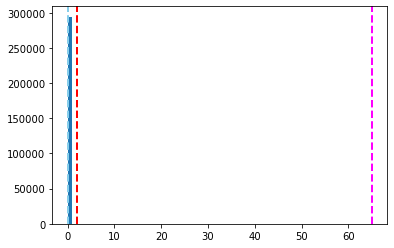

In [19]:
# T-Test
t,p = stats.ttest_1samp(purchased, 0)
# ttest_1samp is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print ("t-statistic:" + str(t))
print("p-value:" + str(p1))

# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, 0, 1.15)
plt.hist(purchased, bins=1)
# show the hypothesized population mean
plt.axvline(purchased.mean(), color='skyblue', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(purchased.mean() + t*purchased.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

Pada plot diatas, didapatkan p-value yang lebih rendah dari critical value 0,05(5%). Dengan ini berarti kita dapat me-reject H0(null hypothesis) dan mengambil H1. Terbukti bahwa rata-rata user tidak membeli(0) terlepas page tersebut baru atau tidak.

### A/B Testing
Kita akan melakukan permutation test terlebih dahulu. Dengan asumsi ada 1000 visitor ke web dan mengarahkan 500 ke original page dan sisanya ke page baru. Untuk setiap page, kita memiliki array yang berisi nilai 1 atau 0 untuk apakah pengunjung membeli atau tidak.

In [4]:
userA = []
for i in range(0, 500):
    # any random float between 0 to 1
    x = round(random.uniform(0, 1), 2)
    userA.append(x)

In [5]:
userB = []
for i in range(0, 500):
    # any random float between 0 to 1
    x = round(random.uniform(0, 1), 2)
    userB.append(x)

In [6]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate([data1,data2])

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

permutation_sample(userA,userB)

(array([0.23, 0.58, 0.3 , 0.58, 0.42, 0.15, 0.13, 0.  , 0.68, 0.88, 0.98,
        0.28, 0.29, 0.78, 0.34, 0.98, 0.17, 0.66, 0.3 , 0.41, 0.06, 0.86,
        0.53, 0.8 , 0.34, 0.86, 0.69, 0.51, 0.66, 0.87, 0.75, 0.51, 0.61,
        0.66, 0.73, 0.71, 0.23, 0.52, 0.87, 0.27, 0.59, 0.05, 0.08, 0.69,
        0.61, 0.31, 0.53, 0.74, 0.09, 0.68, 0.25, 0.45, 0.33, 0.93, 0.41,
        0.47, 0.11, 0.57, 0.48, 0.76, 0.3 , 0.18, 0.45, 0.92, 0.39, 0.74,
        0.  , 0.72, 0.66, 0.57, 0.84, 0.67, 0.2 , 0.2 , 0.4 , 0.09, 0.8 ,
        0.63, 0.62, 0.9 , 0.62, 0.23, 0.76, 0.4 , 0.04, 0.59, 0.14, 0.62,
        0.08, 0.79, 0.67, 0.4 , 0.61, 0.44, 0.52, 0.57, 0.39, 0.01, 0.36,
        0.7 , 0.16, 0.48, 0.97, 0.28, 0.8 , 0.61, 0.07, 0.4 , 0.55, 0.96,
        0.53, 0.47, 0.31, 0.07, 0.32, 0.69, 0.51, 0.85, 0.19, 0.22, 0.94,
        0.55, 0.24, 0.84, 0.04, 0.34, 0.45, 0.37, 0.24, 0.57, 0.21, 0.05,
        0.87, 0.65, 0.16, 0.87, 0.77, 0.47, 0.45, 0.59, 0.81, 0.58, 0.37,
        1.  , 0.11, 0.15, 0.07, 0.22, 

In [63]:
#Generate numpy array of A and B clicks through
clickthrough_A=np.concatenate((np.full(45,1,dtype=int),np.full(500-45,0,dtype=int)),axis=0)
clickthrough_B=np.concatenate((np.full(67,1,dtype=int),np.full(500-67,0,dtype=int)),axis=0)
np.random.shuffle(clickthrough_A)
np.random.shuffle(clickthrough_B)

#The Null-hypothesis
def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B)
    return frac_B - frac_A

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

# Compute difference of mean impact force from experiment
diff_frac_obs = diff_frac(clickthrough_A,clickthrough_B)

# Draw 10,000 permutation replicates
perm_replicates = draw_perm_reps(clickthrough_A, clickthrough_B,diff_frac, size=10000)
    
p_value = np.sum(perm_replicates >= diff_frac_obs) / 10000
print('The p-value is %f' % p_value)

The p-value is 0.019600


In [8]:
#Generate numpy array of A and B clicks through
clickthrough_A=np.concatenate((np.full(259241,1,dtype=int),np.full(294478-259241,0,dtype=int)),axis=0)
clickthrough_B=np.concatenate((np.full(35237,1,dtype=int),np.full(294478-35237,0,dtype=int)),axis=0)
np.random.shuffle(clickthrough_A)
np.random.shuffle(clickthrough_B)

#The Null-hypothesis
def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B)
    return frac_B - frac_A

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

# Compute difference of mean impact force from experiment
diff_frac_obs = diff_frac(clickthrough_A,clickthrough_B)

# Draw 10,000 permutation replicates
perm_replicates = draw_perm_reps(clickthrough_A, clickthrough_B,diff_frac, size=10000)
    
p_value = np.sum(perm_replicates >= diff_frac_obs) / 10000
print('The p-value is %f' % p_value)

The p-value is 1.000000


## Kesimpulan


Dari A/B testing hasil yang diperoleh adalah p-value=0.018400 hasil yang relatif kecil, jadi mungkin dapat kita simpulkan bahwa desain ulang page adalah sebuah peningkatan dan bisa disebut statistikal significant. Namun statistikal signifikan bukan berarti praktikal signifikan, terlihat dari T-test sebelumnya bahwa sebagian besar user tidak melakukan pembelian baik di page lama mauupun baru, sehingga pembaruan page dirasa belum perlu dilakukan. Namun apabila ada keputusan atau variabel lain terkait hal ini, perlu dilakukan pertimbangan lebih lanjut dengan tim-tim terkait.